### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17/notebooks/Week-2-Thu.ipynb


# Week 2, Thursday: Introduction to Probability & Statistics. II 

In [1]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

### Uncertainty for the mean and the sample standard deviation

We would also like to know the uncertainty of our estimates $\overline{x}$ and $s$.  Note that $s$ is **NOT** the uncertainty of $\overline{x}$.  Rather the uncertainty of $\overline{x}$, $\sigma_{\overline{x}}$ is 
$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$
which we call the *standard error of the mean*.

The uncertainty of $s$ itself is
$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

Note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$.

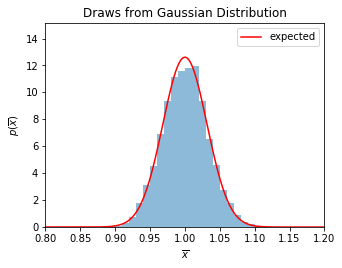

In [2]:
### let's see how it looks in practice by doing a few numerical experiments
# 1) draw k=10 numbers from N(mu=1.0, sigma=0.1) and compute their mean; repeat this 
#   computation M=10,000 times and plot the distribution of these M means; is this
#   distribution well described by N(1.0, 0.1/sqrt(k))? 
np.random.seed(42)
k = 10
M = 10000
mu = 1.0
sigma = 0.1
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = norm(mu, sigma).rvs(k) # here we draw k numbers from N(mu=1.0, sigma=0.1)
    means[i] = np.mean(x)
## now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(5, 3.75))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 41),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
xGrid = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, gauss, ls='-', c='red', label='expected')

plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Draws from Gaussian Distribution')
plt.legend()
plt.show()

st.dev.= 0.100279350526


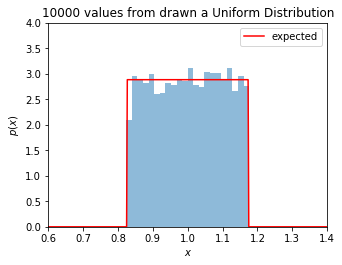

In [5]:
### what if we don't draw from a gaussian distribution, but instead from a uniform distribution?
# 2) draw k=10 numbers from a uniform distribution U(mu=1.0, W) and compute their mean; repeat this 
#    computation M=1000 times and plot the distribution of these M means; is this
#    distribution well described by N(1.0, 0.1/sqrt(k))? 
# let's first see one (largish) sample drawn from uniform distribution
k = 10
M = 10000
mu = 1.0
sigma = 0.1
W = sigma*np.sqrt(12.0)  # same standard deviation as for gaussian
left = mu - 0.5 * W    
x = uniform(left, W).rvs(10000) # here we draw 10000 numbers between 0.8268 and 1.1732
print 'st.dev.=',np.std(x)
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(5, 3.75))
# histogram the data
ax.hist(x, bins=np.linspace(0.6, 1.4, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected uniform distribution
xGrid = np.linspace(0, 2, 1000)
flat = uniform(left,W).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, flat, ls='-', c='red', label='expected')
plt.xlim(0.6, 1.4)
plt.ylim(0, 4)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('10000 values from drawn a Uniform Distribution')
plt.legend()
plt.show()

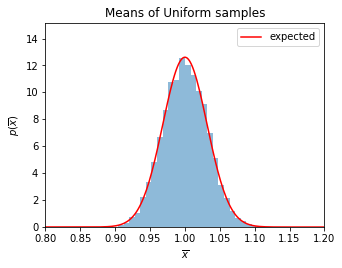

In [6]:
### what if we don't draw from a gaussian distribution, but instead from a uniform distribution?
# 2) draw k=10 numbers from a uniform distribution U(mu=1.0, W) and compute their mean; repeat this 
#    computation M=1000 times and plot the distribution of these M means; is this
#    distribution well described by N(1.0, 0.1/sqrt(k))? 
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.8268 and 1.1732  
    means[i] = np.mean(x)
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(5, 3.75))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
x = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(x)  # this is a function of x: gauss(x)
plt.plot(x, gauss, ls='-', c='red', label='expected')
plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Means of Uniform samples')
plt.legend()
plt.show()

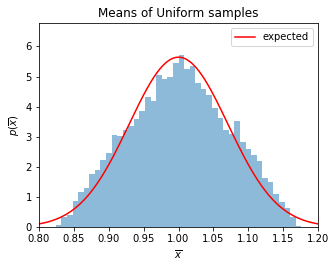

In [8]:
### this is becoming interesting: it looks like it doesn't matter from which 
### distribution we draw our sample! Does it depend on the sample size? 
# 3) draw now k=2 numbers from U(mu=1.0, W=2.0) 
k = 2
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.8268 and 1.1732  
    means[i] = np.mean(x)
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(5, 3.75))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
x = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(x)  # this is a function of x: gauss(x)
plt.plot(x, gauss, ls='-', c='red', label='expected')
plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Means of Uniform samples')
plt.legend()
plt.show()

Now it is not such a good agreement any more!!

The blue histogram seems limited to the range from 0.83 to 1.17, why? 

![SlideGrab](figures/p6.pdf) 

![SlideGrab](figures/p7.pdf) 

![SlideGrab](figures/p22.pdf) 

While it is perhaps most common to compute the mean, the median is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by outliers.

In [18]:
# Execute this cell.  Think about what it is doing.
data = norm(0.5, 0.1).rvs(10000)
mean = np.mean(data)
median = np.median(data)
stdev = np.std(data)
mask = data>0.7
print 'the number of modified points:', np.sum(mask)
data[mask] = data[mask]*10
newmean = np.mean(data)
newmedian = np.median(data)
newstdev = np.std(data)
print 'mean:', mean, newmean
print 'median:', median, newmedian
print 'st.dev.:', stdev, newstdev

the number of modified points: 219
mean: 0.501317955197 0.646380105923
median: 0.500535532633 0.500535532633
st.dev.: 0.100755141803 1.01014423177


Percentiles, $q_p$, are computed as
$$\frac{p}{100} = \int_{-\infty}^{q_p}h(x) dx$$

For example, the 25th, 50th, and 75th percentiles:

In [22]:
# execute:
mu=100
sigma=15
sampleSize=1000000    # IQ distribution in Seattle
%timeit data = norm(mu, sigma).rvs(sampleSize) 
q25 = np.percentile(data, 25)
%timeit q50 = np.percentile(data, 50)
q75 = np.percentile(data, 75)
print q25, q50, q75 

10 loops, best of 3: 38.1 ms per loop
100 loops, best of 3: 10.4 ms per loop
89.8255391974 99.9786612918 110.101298105


In [23]:
# execute:
%timeit mean = np.mean(data)
%timeit median = np.median(data)
print mean, median

1000 loops, best of 3: 395 µs per loop
100 loops, best of 3: 11.1 ms per loop
0.501317955197 0.500535532633


The difference between the 25th and 75th percentiles, $q_{75} - q_{25}$, is called the *interquartile range*.

The median and interquartile range are more _robust_ estimators of the location and scale parameters 
than the mean and standard deviation.  So, one can create a robust standard deviation like estimator,
from the interquartile range as
$$\sigma_G = 0.7413(q_{75} - q_{25}).$$

The normalization (0.7413) makes it *unbiased* estimator of standard deviation in case of a Gaussian.

![SlideGrab](figures/p24.pdf)  

In [13]:
# execute
%timeit sigmaG = astroMLstats.sigmaG(data)
%timeit stdev = np.std(data)

100 loops, best of 3: 15.4 ms per loop
100 loops, best of 3: 3.54 ms per loop


In [14]:
# execute
print astroMLstats.sigmaG(data), np.std(data)

15.0017574273 14.9995837693


The mode is the most probable value, determined from the peak of the distribution, which is the value where the derivative is 0:
$$ \left(\frac{dh(x)}{dx}\right)_{x_m} = 0$$

The mode can be estimated (at least for a Gaussian distribution) is
$$x_m = 3q_{50} - 2\mu$$

In [22]:
# Execute this cell
mode = 3*q50 - 2*mean
print mode, mean, median

100.012526143 100.007193094 100.008970777


## Distributions

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form or a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.


### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined above applies here and
$$\sigma = \frac{W}{\sqrt{12}}.$$


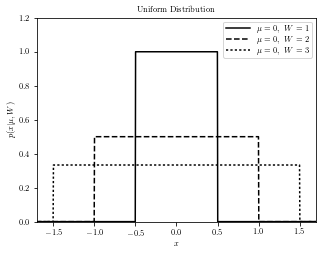

In [24]:
# Execute this cell
%matplotlib inline
%run code/fig_uniform_distribution.py

### Log Normal

Note that if $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$.  Try it.

### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would just be the usual factorial function if we were dealing with integers, but here we have half integers.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

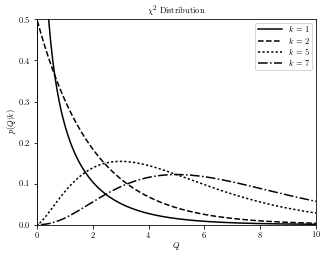

In [27]:
# Execute this cell
%run code/fig_chi2_distribution.py

![SlideGrab](figures/p18.pdf) 

![SlideGrab](figures/p19.pdf) 

![SlideGrab](figures/p20.pdf) 

![SlideGrab](figures/p25.pdf) 

![SlideGrab](figures/p26.pdf) 

## Bivariate and Multivariate Distribution Functions

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the (dimensionless) correlation coefficient.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.   These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Figure 3.22 from the textbook):
![Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution.  These are called the **principal axes** and are given by
$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$
and
$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this coordinate system are
$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that the correlation vanishes in this coordinate system and the bivariate Gaussian is just a product of two univariate Gaussians.  This concept will be crucial for understanding Principal Component Analysis when we get to Chapter 7, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$.  Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Figure 3.23 from the textbook for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

For an example of how to generate a bivariate distribution and plot confidence contours, execute the following cell.

In [2]:
# Base code drawn from the textbook, Figure 3.22, edited by G. Richards to simplify the example
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = [0, 0]
cov = [[1, 0.3], [0.3, 1]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# Fit those data with a bivariate normal distribution
mean, sigma_x, sigma_y, alpha = fit_bivariate_normal(x,y)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_x, N * sigma_y, angle=alpha * 180./np.pi, lw=1, ec='k', fc='none'))

NameError: name 'np' is not defined

![SlideGrab](figures/p27.pdf) 

![SlideGrab](figures/p28.pdf) 

![SlideGrab](figures/p29.pdf) 

![SlideGrab](figures/p30.pdf) 

![SlideGrab](figures/p31.pdf) 

![SlideGrab](figures/p32.pdf) 

(array([  4.,   6.,   9.,  20.,  25.,  20.,   7.,   7.,   2.]),
 array([  64.84620176,   73.04087051,   81.23553926,   89.43020802,
          97.62487677,  105.81954552,  114.01421428,  122.20888303,
         130.40355178,  138.59822053]),
 <a list of 1 Patch objects>)

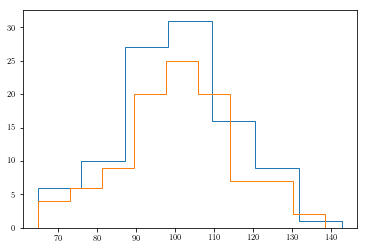

In [36]:
from astroML.plotting import hist as fancyhist
x = norm(100, 15).rvs(100)
fancyhist(x, bins="scott", histtype="step")
fancyhist(x, bins="freedman", histtype="step")

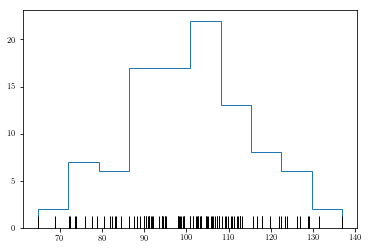

In [37]:
plt.hist(x,histtype="step")
plt.plot(x, 0*x, '|', color='k', markersize=25) # N.B. markersize is in *points*

We will learn more tricks later in class (Week 9), see

http://www.astroml.org/book_figures/chapter6/fig_GMM_density_estimation.html